In [1]:
import xarray as xr
import pandas as pd
import numpy as np

### Carregando os arquivos NetCDF gerados após o cálculo dos acumulados mensais 

In [2]:
merge = xr.open_mfdataset("C:/Users/Carol/Documents/PEC/Dissertacao/JupyterNotebooks/Precipitacao MERGE/2*.nc",combine='nested',concat_dim=['month'])

In [3]:
merge

<xarray.Dataset>
Dimensions:  (lat: 51, lon: 24, month: 192)
Coordinates:
  * lon      (lon) float32 -47.599197 -47.399193 ... -43.199097 -42.999092
  * lat      (lat) float32 -20.199886 -19.999886 ... -10.399849 -10.199848
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    prec     (month, lat, lon) float32 dask.array<chunksize=(12, 51, 24), meta=np.ndarray>
    nest     (month, lat, lon) float32 dask.array<chunksize=(12, 51, 24), meta=np.ndarray>

* As coordenadas são longitude (lon), latitude (lat) e mês (month)
Os meses para os anos de 2002 a 2017 foram concatenados (192 meses), porém não estão com a coordenada do tempo correta.
Para isso será criado um novo dataset com as coordenadas lat, lon e time.
*  Criando as "etiquetas" do tempo (coordenada)

In [4]:
time = pd.date_range('2002-01-01', periods=192, freq='M')

In [5]:
time

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31',
               ...
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

* Criando um array com os valores de latitude (coordenada), longitude (coordenada) e precipitação (variável)

In [6]:
lat = merge['lat'].values

In [7]:
lat

array([-20.199886 , -19.999886 , -19.799885 , -19.599884 , -19.399883 ,
       -19.199883 , -18.999882 , -18.799881 , -18.59988  , -18.39988  ,
       -18.199879 , -17.999878 , -17.799877 , -17.599876 , -17.399876 ,
       -17.199875 , -16.999874 , -16.799873 , -16.599873 , -16.399872 ,
       -16.199871 , -15.99987  , -15.79987  , -15.599869 , -15.399868 ,
       -15.199867 , -14.9998665, -14.799866 , -14.599865 , -14.399864 ,
       -14.199863 , -13.999863 , -13.799862 , -13.599861 , -13.39986  ,
       -13.19986  , -12.999859 , -12.799858 , -12.599857 , -12.399857 ,
       -12.199856 , -11.999855 , -11.799854 , -11.5998535, -11.399853 ,
       -11.199852 , -10.999851 , -10.79985  , -10.59985  , -10.399849 ,
       -10.199848 ], dtype=float32)

In [8]:
lat.shape

(51,)

In [9]:
lon = merge['lon'].values

In [10]:
lon

array([-47.599197, -47.399193, -47.19919 , -46.999184, -46.79918 ,
       -46.599174, -46.39917 , -46.199165, -45.99916 , -45.799156,
       -45.59915 , -45.399147, -45.199142, -44.999138, -44.799133,
       -44.59913 , -44.399124, -44.19912 , -43.999115, -43.79911 ,
       -43.599106, -43.3991  , -43.199097, -42.999092], dtype=float32)

In [11]:
lon.shape

(24,)

In [12]:
prec = merge['prec'].values

In [13]:
prec.shape

(192, 51, 24)

* Unindo as coordenadas e variável num dataArray

In [14]:
da =  xr.DataArray(prec, coords=[time,list(lat),list(lon) ], dims=['time','lat','lon'])

In [15]:
da

<xarray.DataArray (time: 192, lat: 51, lon: 24)>
array([[[2.33349106e+02, 1.84839630e+02, 1.95501556e+02, ...,
         3.33566528e+02, 3.53644348e+02, 3.27310425e+02],
        [2.27765839e+02, 1.86699524e+02, 1.88142975e+02, ...,
         3.57548950e+02, 3.62495544e+02, 3.69013672e+02],
        [2.18691071e+02, 1.45928558e+02, 1.68248322e+02, ...,
         3.52794128e+02, 3.79946381e+02, 3.78265015e+02],
        ...,
        [5.03718781e+02, 4.78245636e+02, 5.17861389e+02, ...,
         3.29013824e+02, 3.33395416e+02, 3.54403473e+02],
        [5.06236023e+02, 4.95478455e+02, 4.87898956e+02, ...,
         3.41019409e+02, 3.46607239e+02, 3.55862396e+02],
        [4.70417480e+02, 4.86768921e+02, 4.78421234e+02, ...,
         3.44745514e+02, 3.46885193e+02, 3.53772827e+02]],

       [[3.05280884e+02, 3.56063171e+02, 3.31439392e+02, ...,
         2.42264191e+02, 2.25494705e+02, 2.22346436e+02],
        [3.01601501e+02, 3.23931610e+02, 3.31662964e+02, ...,
         2.01142487e+02, 1.74579056e+02, 1.92912231e+02],
        [3.04569550e+02, 2.90951172e+02, 3.15545593e+02, ...,
         1.53072144e+02, 6.80424881e+01, 1.49845901e+02],
        ...,
        [3.06846375e+02, 3.03755676e+02, 2.08226288e+02, ...,
         9.90474472e+01, 1.05144608e+02, 1.12278923e+02],
        [3.05192902e+02, 2.90287476e+02, 2.35487534e+02, ...,
         1.03072792e+02, 9.73777847e+01, 1.08553513e+02],
        [2.56739502e+02, 2.85324127e+02, 2.47076324e+02, ...,
         1.03482109e+02, 1.04354477e+02, 1.11619926e+02]],

       [[1.47982559e+02, 1.59293121e+02, 1.64403442e+02, ...,
         9.08047180e+01, 7.92785645e+01, 8.08823242e+01],
        [1.33851257e+02, 1.28810242e+02, 1.32924988e+02, ...,
         8.01628723e+01, 5.86215057e+01, 6.44428482e+01],
        [7.32324448e+01, 2.18599281e+01, 8.93046570e+01, ...,
         4.46493607e+01, 8.73677635e+00, 4.30786972e+01],
        ...,
        [2.29561920e+02, 2.16725433e+02, 2.35272705e+02, ...,
         5.59593887e+01, 6.32750092e+01, 5.21662674e+01],
        [2.43044189e+02, 2.55446884e+02, 2.63422211e+02, ...,
         4.51126328e+01, 4.55497971e+01, 4.02743988e+01],
        [2.19138916e+02, 2.43727692e+02, 2.67662567e+02, ...,
         4.96258850e+01, 4.16773949e+01, 3.24381638e+01]],

       ...,

       [[1.21106804e+02, 1.28412613e+02, 1.10246078e+02, ...,
         1.04002884e+02, 8.94353027e+01, 6.32695541e+01],
        [1.08618973e+02, 8.33637695e+01, 9.49908905e+01, ...,
         9.93989487e+01, 9.48704758e+01, 6.49442444e+01],
        [9.35318146e+01, 7.60909119e+01, 8.19454117e+01, ...,
         1.08521088e+02, 9.87505341e+01, 6.77191772e+01],
        ...,
        [3.54082108e+01, 3.95148468e+01, 2.64058876e+01, ...,
         1.79931808e+00, 7.67317176e-01, 1.21473201e-01],
        [2.94700909e+01, 4.84287033e+01, 3.08184643e+01, ...,
         2.87061071e+00, 1.78674006e+00, 3.18387389e-01],
        [2.38615150e+01, 2.91357708e+01, 2.78503494e+01, ...,
         5.29649496e+00, 3.72554922e+00, 2.13464975e+00]],

       [[2.27096161e+02, 2.38983994e+02, 2.27631989e+02, ...,
         1.68629211e+02, 1.71443924e+02, 2.03744858e+02],
        [2.70268585e+02, 2.63829773e+02, 2.43920410e+02, ...,
         1.52854614e+02, 1.67694489e+02, 2.08461105e+02],
        [3.07414368e+02, 2.57740417e+02, 2.92636871e+02, ...,
         1.70933914e+02, 1.65173798e+02, 2.13817780e+02],
        ...,
        [1.53307953e+02, 1.88467941e+02, 1.82934448e+02, ...,
         8.83564987e+01, 1.00626518e+02, 9.47646103e+01],
        [1.43653427e+02, 1.64693848e+02, 1.68346619e+02, ...,
         9.02915649e+01, 9.07423477e+01, 7.81112976e+01],
        [1.43470825e+02, 1.44245468e+02, 1.56745605e+02, ...,
         9.28970490e+01, 9.70365753e+01, 9.20229111e+01]],

       [[2.71488556e+02, 3.02141663e+02, 3.02688843e+02, ...,
         3.13612610e+02, 3.44658844e+02, 3.40314758e+02],
        [2.92093414e+02, 3.03150970e+02, 3.14846283e+02, ...,
         2.40184845e+02, 2.82177704e+02, 3.06222443e+02],
        [3.02648712e+02

In [16]:
da = da.rename('prec')

In [17]:
da

<xarray.DataArray 'prec' (time: 192, lat: 51, lon: 24)>
array([[[2.33349106e+02, 1.84839630e+02, 1.95501556e+02, ...,
         3.33566528e+02, 3.53644348e+02, 3.27310425e+02],
        [2.27765839e+02, 1.86699524e+02, 1.88142975e+02, ...,
         3.57548950e+02, 3.62495544e+02, 3.69013672e+02],
        [2.18691071e+02, 1.45928558e+02, 1.68248322e+02, ...,
         3.52794128e+02, 3.79946381e+02, 3.78265015e+02],
        ...,
        [5.03718781e+02, 4.78245636e+02, 5.17861389e+02, ...,
         3.29013824e+02, 3.33395416e+02, 3.54403473e+02],
        [5.06236023e+02, 4.95478455e+02, 4.87898956e+02, ...,
         3.41019409e+02, 3.46607239e+02, 3.55862396e+02],
        [4.70417480e+02, 4.86768921e+02, 4.78421234e+02, ...,
         3.44745514e+02, 3.46885193e+02, 3.53772827e+02]],

       [[3.05280884e+02, 3.56063171e+02, 3.31439392e+02, ...,
         2.42264191e+02, 2.25494705e+02, 2.22346436e+02],
        [3.01601501e+02, 3.23931610e+02, 3.31662964e+02, ...,
         2.01142487e+02, 1.74579056e+02, 1.92912231e+02],
        [3.04569550e+02, 2.90951172e+02, 3.15545593e+02, ...,
         1.53072144e+02, 6.80424881e+01, 1.49845901e+02],
        ...,
        [3.06846375e+02, 3.03755676e+02, 2.08226288e+02, ...,
         9.90474472e+01, 1.05144608e+02, 1.12278923e+02],
        [3.05192902e+02, 2.90287476e+02, 2.35487534e+02, ...,
         1.03072792e+02, 9.73777847e+01, 1.08553513e+02],
        [2.56739502e+02, 2.85324127e+02, 2.47076324e+02, ...,
         1.03482109e+02, 1.04354477e+02, 1.11619926e+02]],

       [[1.47982559e+02, 1.59293121e+02, 1.64403442e+02, ...,
         9.08047180e+01, 7.92785645e+01, 8.08823242e+01],
        [1.33851257e+02, 1.28810242e+02, 1.32924988e+02, ...,
         8.01628723e+01, 5.86215057e+01, 6.44428482e+01],
        [7.32324448e+01, 2.18599281e+01, 8.93046570e+01, ...,
         4.46493607e+01, 8.73677635e+00, 4.30786972e+01],
        ...,
        [2.29561920e+02, 2.16725433e+02, 2.35272705e+02, ...,
         5.59593887e+01, 6.32750092e+01, 5.21662674e+01],
        [2.43044189e+02, 2.55446884e+02, 2.63422211e+02, ...,
         4.51126328e+01, 4.55497971e+01, 4.02743988e+01],
        [2.19138916e+02, 2.43727692e+02, 2.67662567e+02, ...,
         4.96258850e+01, 4.16773949e+01, 3.24381638e+01]],

       ...,

       [[1.21106804e+02, 1.28412613e+02, 1.10246078e+02, ...,
         1.04002884e+02, 8.94353027e+01, 6.32695541e+01],
        [1.08618973e+02, 8.33637695e+01, 9.49908905e+01, ...,
         9.93989487e+01, 9.48704758e+01, 6.49442444e+01],
        [9.35318146e+01, 7.60909119e+01, 8.19454117e+01, ...,
         1.08521088e+02, 9.87505341e+01, 6.77191772e+01],
        ...,
        [3.54082108e+01, 3.95148468e+01, 2.64058876e+01, ...,
         1.79931808e+00, 7.67317176e-01, 1.21473201e-01],
        [2.94700909e+01, 4.84287033e+01, 3.08184643e+01, ...,
         2.87061071e+00, 1.78674006e+00, 3.18387389e-01],
        [2.38615150e+01, 2.91357708e+01, 2.78503494e+01, ...,
         5.29649496e+00, 3.72554922e+00, 2.13464975e+00]],

       [[2.27096161e+02, 2.38983994e+02, 2.27631989e+02, ...,
         1.68629211e+02, 1.71443924e+02, 2.03744858e+02],
        [2.70268585e+02, 2.63829773e+02, 2.43920410e+02, ...,
         1.52854614e+02, 1.67694489e+02, 2.08461105e+02],
        [3.07414368e+02, 2.57740417e+02, 2.92636871e+02, ...,
         1.70933914e+02, 1.65173798e+02, 2.13817780e+02],
        ...,
        [1.53307953e+02, 1.88467941e+02, 1.82934448e+02, ...,
         8.83564987e+01, 1.00626518e+02, 9.47646103e+01],
        [1.43653427e+02, 1.64693848e+02, 1.68346619e+02, ...,
         9.02915649e+01, 9.07423477e+01, 7.81112976e+01],
        [1.43470825e+02, 1.44245468e+02, 1.56745605e+02, ...,
         9.28970490e+01, 9.70365753e+01, 9.20229111e+01]],

       [[2.71488556e+02, 3.02141663e+02, 3.02688843e+02, ...,
         3.13612610e+02, 3.44658844e+02, 3.40314758e+02],
        [2.92093414e+02, 3.03150970e+02, 3.14846283e+02, ...,
         2.40184845e+02, 2.82177704e+02, 3.06222443e+02],
        [3.02648

* Transformando o dataArray num dataset (se no futuro eu tiver outras variáveis dentro dessas mesmas dimensões dadas pelas coordenadas, posso juntá-las a esse dataset)

In [18]:
merge_ds = da.to_dataset()

In [19]:
merge_ds

<xarray.Dataset>
Dimensions:  (lat: 51, lon: 24, time: 192)
Coordinates:
  * time     (time) datetime64[ns] 2002-01-31 2002-02-28 ... 2017-12-31
  * lat      (lat) float32 -20.199886 -19.999886 ... -10.399849 -10.199848
  * lon      (lon) float32 -47.599197 -47.399193 ... -43.199097 -42.999092
Data variables:
    prec     (time, lat, lon) float32 233.3491 184.83963 ... 141.10486 102.9781

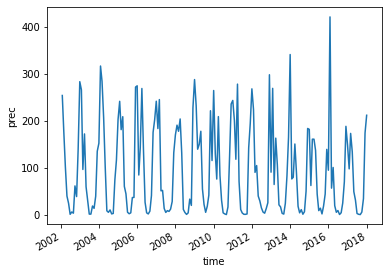

In [23]:
merge_ds['prec'].mean(dim=('lat','lon')).plot()


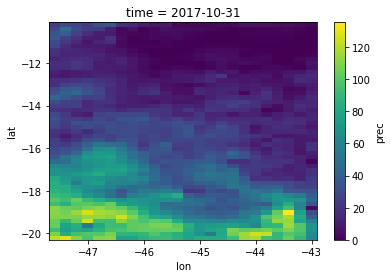

In [21]:
merge_ds['prec'].sel(time='2017-10-31').plot()

In [22]:
#merge_ds.to_netcdf('MERGE_2002_2017_v2.nc')